# Problem Statement : 

- Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

# Data Dictionary:

### RATINGS FILE DESCRIPTION

- All ratings are contained in the file "ratings.dat" and are in the following format:

      - UserID::MovieID::Rating::Timestamp

      - UserIDs range between 1 and 6040

      - MovieIDs range between 1 and 3952

      - Ratings are made on a 5-star scale (whole-star ratings only)

      - Timestamp is represented in seconds

      - Each user has at least 20 ratings


### USERS FILE DESCRIPTION

- User information is in the file "users.dat" and is in the following format:

    - UserID::Gender::Age::Occupation::Zip-code

- All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female

      Age is chosen from the following ranges:

      1: "Under 18"
      18: "18-24"
      25: "25-34"
      35: "35-44"
      45: "45-49"
      50: "50-55"
      56: "56+"

- Occupation is chosen from the following choices:

      0: "other" or not specified
      1: "academic/educator"
      2: "artist"
      3: "clerical/admin"
      4: "college/grad student"
      5: "customer service"
      6: "doctor/health care"
      7: "executive/managerial"
      8: "farmer"
      9: "homemaker"
      10: "K-12 student"
      11: "lawyer"
      12: "programmer"
      13: "retired"
      14: "sales/marketing"
      15: "scientist"
      16: "self-employed"
      17: "technician/engineer"
      18: "tradesman/craftsman"
      19: "unemployed"
      20: "writer"

### MOVIES FILE DESCRIPTION

- Movie information is in the file "movies.dat" and is in the following format:

     - MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including year of release)

      - Genres are pipe-separated and are selected from the following genres:

      Action
      Adventure
      Animation
      Children's
      Comedy
      Crime
      Documentary
      Drama
      Fantasy
      Film-Noir
      Horror
      Musical
      Mystery
      Romance
      Sci-Fi
      Thriller
      War
      Western


##  Concepts Tested:
- Recommender Engine
- Collaborative Filtering (Item-based & User-based Approach)
- Pearson Correlation

- Nearest Neighbors using Cosine Similarity
- Matrix Factorization

## Required to do : 

- Reading the data files, formatting them into a proper workable format and merging the data files into one single dataframe


- Performing exploratory data analysis like checking the structure & characteristics of the dataset and cleaning the data

- Performing feature engineering steps type conversions and deriving new features like ‘Release Year’

- Visualizing the data with respect to different categories to get a better understanding of the underlying distribution

- Grouping the data in terms of Average Rating and No. of Ratings given

- Creating a pivot table of movie titles & user id and imputing the NaN values with a suitable value

- Follow the Item-based approach and Pearson Correlation

- Take a movie name as input from the user Recommend 5 similar movies based on Pearson Correlation

- Cosine Similarity

- Print the item similarity matrix and user similarity matrix

- Example: An user-user similarity matrix just for demonstration.

- Create a CSR matrix using the pivot table.[Optional, This is an extended approach, link to example implementation].

- Write a function to return top 5 recommendations for a given item

- [sklearn optional] Take a movie name as user input and use KNN algorithm to recommend 5 similar movies based on Cosine Similarity. [link to sklearn Nearest Neighbor documentation]


- Matrix Factorization

- Use cmfrec/Surprise library to run matrix factorization. (Show results with d=4).

- Evaluate the model’s performance using RMSE and MAPE.

- Bonus - how can you do a train test split for MF?

- Embeddings for item-item and user-user similarity

- Re-design the item-item similarity function to use MF embeddings (d=4) instead of raw features

- Similarly, do this for user-user similarity

- Bonus: Get d=2 embeddings, and plot the results. Write down your analysis from this visualisation. (Compare with other visualization techniques)

- Follow the User-based approach (Optional)

- Ask the user to rate a few movies and create a dataframe of the user’s choices.

- Find other users who’ve watched the same movies as the new user.

- Sort the old users by the count of most movies in common with the new user.

- Take the top 100 users and calculate a Similarity Score for each user using the Pearson Correlation function.

- Get the top 10 users with the highest similarity indices, all the movies for these users, and add Weighted movie Ratings by Multiplying the Rating to the Similarity Index.

- Calculate the average recommendation score by dividing the Weighted Rating by the Similarity Index and select movies with the highest score i.e., 5.

- Now, recommend 10 movies based on the ratings given by old users who are similar to the new user.


### Questionnaire:

- Users of which age group have watched and rated the most number of movies?

- Users belonging to which profession have watched and rated the most movies?

- Most of the users in our dataset who’ve rated the movies are Male. (T/F)

- Most of the movies present in our dataset were released in which decade?

- 70s b. 90s c. 50s d.80s

- The movie with maximum no. of ratings is ___.

- Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

- On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

- Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.

- Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

- Give the sparse ‘row’ matrix representation for the following dense matrix -

[[1 0]
[3 7]]

# New Section

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
movies = pd.read_fwf("/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Recommender System for OTT /zee-movies.dat",encoding="ISO-8859-1")
ratings =pd.read_fwf("/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Recommender System for OTT /zee-ratings.dat",encoding="ISO-8859-1")
users = pd.read_fwf("/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Recommender System for OTT /zee-users.dat",encoding="ISO-8859-1")

In [3]:
delimiter ="::"

users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split(delimiter,expand = True)
users.columns = ["UserID","Gender","Age","Occupation","Zipcode"]

users["Age"].replace({"1": "Under 18","18": "18-24","25": "25-34",
                          "35": "35-44","45": "45-49","50": "50-55","56": "56+"},inplace=True)

users["Occupation"] = users["Occupation"].astype(int).replace({0: "other",1: "academic/educator",2: "artist",
                                                               3: "clerical/admin",4: "college/grad student",
                                             5: "customer service",6: "doctor/health care",7: "executive/managerial",
                                             8: "farmer" ,9: "homemaker",10: "K-12 student",11: "lawyer",
                                             12: "programmer",13: "retired",14: "sales/marketing",15: "scientist",
                                             16: "self-employed",17: "technician/engineer",
                                             18: "tradesman/craftsman",19: "unemployed",20: "writer"},
                                            )

delimiter ="::"

ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split(delimiter,expand = True)
ratings.columns = ["UserID","MovieID","Rating","Timestamp"]


movies.drop(["Unnamed: 1","Unnamed: 2"],axis = 1,inplace=True)



delimiter ="::"

movies = movies["Movie ID::Title::Genres"].str.split(delimiter,expand = True)
movies.columns = ["MovieID","Title","Genres"]


movies.shape,ratings.shape,users.shape


((3883, 3), (1000209, 4), (6040, 5))

In [4]:
movies["Release_year"] = movies["Title"].str.extract('^(.+)\s\(([0-9]*)\)$',expand = True)[1]
movies["Title"] = movies["Title"].str.split("(").apply(lambda x:x[0])

In [5]:
from datetime import datetime
ratings["Watch_Hour"] =ratings["Timestamp"].apply(lambda x:datetime.fromtimestamp(int(x)).hour)
ratings.drop(["Timestamp"],axis = 1,inplace=True)

In [6]:
movies.shape,ratings.shape,users.shape


((3883, 4), (1000209, 4), (6040, 5))

In [7]:
df = users.merge(movies.merge(ratings,on="MovieID",how="outer"),on="UserID",how="outer")

In [8]:
(df.isna().sum())/len(df)  * 100

UserID          0.017693
Gender          0.017693
Age             0.017693
Occupation      0.017693
Zipcode         0.017693
MovieID         0.000000
Title           0.000000
Genres          0.406443
Release_year    0.377854
Rating          0.017693
Watch_Hour      0.017693
dtype: float64

In [9]:
data = df.copy()
data.dropna(inplace= True)

In [10]:
data

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Genres,Release_year,Rating,Watch_Hour
0,1,F,Under 18,K-12 student,48067,1,Toy Story,Animation|Children's|Comedy,1995,5,23.0
1,1,F,Under 18,K-12 student,48067,48,Pocahontas,Animation|Children's|Musical|Romance,1995,5,23.0
2,1,F,Under 18,K-12 student,48067,150,Apollo 13,Drama,1995,5,22.0
3,1,F,Under 18,K-12 student,48067,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantas,1977,4,22.0
4,1,F,Under 18,K-12 student,48067,527,Schindler's List,Drama|War,1993,5,23.0
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25-34,doctor/health care,11106,3683,Blood Simple,Drama|Film-Noir,1984,4,8.0
1000205,6040,M,25-34,doctor/health care,11106,3703,Mad Max 2,Action|Sci-Fi,1981,4,23.0
1000206,6040,M,25-34,doctor/health care,11106,3735,Serpico,Crime|Drama,1973,4,8.0
1000207,6040,M,25-34,doctor/health care,11106,3751,Chicken Run,Animation|Children's|Comedy,2000,4,23.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996144 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        996144 non-null  object 
 1   Gender        996144 non-null  object 
 2   Age           996144 non-null  object 
 3   Occupation    996144 non-null  object 
 4   Zipcode       996144 non-null  object 
 5   MovieID       996144 non-null  object 
 6   Title         996144 non-null  object 
 7   Genres        996144 non-null  object 
 8   Release_year  996144 non-null  object 
 9   Rating        996144 non-null  object 
 10  Watch_Hour    996144 non-null  float64
dtypes: float64(1), object(10)
memory usage: 91.2+ MB


In [12]:
data.nunique()

UserID          6040
Gender             2
Age                7
Occupation        21
Zipcode         3439
MovieID         3682
Title           3633
Genres           358
Release_year      81
Rating             5
Watch_Hour        24
dtype: int64

In [13]:
# 6040 unique UserID
# 7 different age groups
# 21 occupations
# 3493 different locations of users
# 3682 unique movies 


In [14]:
# There are movies available in database , which were never been watched by any user before . 
# Thats is the reason we have lots of NaN values in our final dataset. 

In [15]:
data.shape

(996144, 11)

In [16]:
m = movies[["MovieID","Title","Genres"]]

m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"Horro":"Horror",
                     "Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi",
                     "Dr":"Drama",
                     "Documenta":"Documentary",
                     "Wester":"Western",
                     "Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance",
                     "Animati":"Animation",
                     "Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi",
                     "Roma":"Romance","A":"Adventure","Children":"Children's",
                     "Adventu":"Adventure",
                      "Adv":"Adventure",
                      "Wa":"War",
                      "Thrille"  :"Thriller"     ,
                      "Com"        :"Comedy"   ,
                      "Comed"         :"Comedy",
                      "Acti"          :"Action",
                        "Advent"        :"Adventure",
                        "Adventur"      :"Adventure",
                        "Thri":"Thriller",          
                        "Chi":"Children's",           
                        "Ro":"Romance",            
                        "F":"Fantasy",             
                        "We":"Western",            
                        "Documen":"Documentary"       ,
                        "Music":"Musical"         ,
                        "Children":"Children's" ,    
                        "Horr":"Horror"          ,
                     "Children'":"Children's",
                     "Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                     })
m = pd.crosstab(m["MovieID"],       m["Genres"])  
m = pd.DataFrame(np.where(m>=1,1,0),index = m.index,columns=m.columns)

In [17]:
m

Genres,,Action,Action|Adv,Action|Advent,Action|Adventu,Action|Adventur,Action|Adventure,Action|Adventure|,Action|Adventure|A,Action|Adventure|Animation|Children's|Fant,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Come,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Horro,Action|Adventure|Comedy|Horror|Sci-Fi,Action|Adventure|Comedy|Romance,Action|Adventure|Comedy|Sci-Fi,Action|Adventure|Comedy|War,Action|Adventure|Crime,Action|Adventure|Crime|Drama,Action|Adventure|Crime|Thriller,Action|Adventure|Drama,Action|Adventure|Drama|Romance,Action|Adventure|Drama|Thriller,Action|Adventure|Fantas,Action|Adventure|Fantasy,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Horror,Action|Adventure|Horror|Thriller,Action|Adventure|Mystery,Action|Adventure|Mystery|Sci-Fi,Action|Adventure|Romance,Action|Adventure|Romance|Thriller,Action|Adventure|Romance|War,Action|Adventure|S,Action|Adventure|Sci-,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi|Th,Action|Adventure|Sci-Fi|Thriller,Action|Adventure|Sci-Fi|Thriller|War,Action|Adventure|Sci-Fi|War,Action|Adventure|Thriller,Action|Adventure|War,Action|Adventure|Western,Action|Animation|Children's|,Action|Children's,Action|Children's|Fantas,Action|Children's|Fantasy,Action|Com,Action|Comedy,Action|Comedy|Crime,Action|Comedy|Crime|Drama,Action|Comedy|Crime|Horror|Thriller,Action|Comedy|Drama,Action|Comedy|Fantasy,Action|Comedy|Musical,Action|Comedy|Musical|Sci-Fi,Action|Comedy|Romance|Thriller,Action|Comedy|Sci-Fi|Thriller,Action|Comedy|Sci-Fi|War,Action|Comedy|War,Action|Comedy|Western,Action|Crime,Action|Crime|Drama,Action|Crime|Drama|Thriller,Action|Crime|Mystery,Action|Crime|Mystery|Thriller,Action|Crime|Romance,Action|Crime|Sci-Fi,Action|Crime|Thriller,Action|Drama,Action|Drama|Fantasy|Romance,Action|Drama|Mystery,Action|Drama|Mystery|Romance|Thriller,Action|Drama|Romance,Action|Drama|Romance|Thriller,Action|Drama|Sci-Fi|Thriller,Action|Drama|Thriller,Action|Drama|Thriller|War,Action|Drama|War,Action|Drama|Western,Action|Horror,Action|Horror|Sci-Fi,Action|Horror|Sci-Fi|Thriller,Action|Horror|Thriller,Action|Mystery|Romance|Thriller,Action|Mystery|Sci-Fi|Thriller,Action|Mystery|Thriller,Action|Romance,Action|Romance|Sci-Fi,Action|Romance|Thriller,Action|Romance|War,Action|Sci,Action|Sci-Fi,Action|Sci-Fi|Thriller,Action|Sci-Fi|Thriller|War,Action|Sci-Fi|Thriller|Western,Action|Sci-Fi|War,Action|Sci-Fi|Western,Action|Thriller,Action|Thriller|War,Action|War,Action|Western,Adventure,Adventure|Animation|Children's,Adventure|Animation|Children's|Comedy|Fantasy,Adventure|Animation|Children's|Comedy|Musical,Adventure|Animation|Children's|Fantasy,Adventure|Animation|Children's|Musical,Adventure|Animation|Children's|Sci,Adventure|Animation|Film-Noir,Adventure|Animation|Sci-Fi,Adventure|Animation|Sci-Fi|Thriller,Adventure|Chi,Adventure|Chil,Adventure|Childr,Adventure|Childre,Adventure|Children,Adventure|Children',Adventure|Children's,Adventure|Children's|Comedy,Adventure|Children's|Comedy|,Adventure|Children's|Comedy|Fant,Adventure|Children's|Comedy|Fantasy,Adventure|Children's|Comedy|Musical,Adventure|Children's|Dram,Adventure|Children's|Drama,Adventure|Children's|Drama|Musical,Adventure|Children's|Drama|Romance,Adventure|Children's|F,Adventure|Children's|Fantasy,Adventure|Children's|Fantasy|Sci-Fi,Adventure|Children's|Musical,Adventure|Children's|Romance,Adventure|Children's|Sci-Fi,Adventure|Comedy,Adventure|Comedy|Drama,Adventure|Comedy|Musical,Adventure|Comedy|Romance,Adventure|Comedy|Sci-Fi,Adventure|Crime|Sci-Fi|Thriller,Adventure|Drama,Adventure|Drama|Romance,Adventure|Drama|Romance|Sci-Fi,Adventure|Drama|Thriller,Adventure|Drama|Western,Adventure|Fantasy,Adventure|Fantasy|Romance,Adventure|Fantasy|Sci,Adventure|Fantasy|Sci-Fi,Adventure|Musical,Adventure|Musical|Romance,Adventure|Romance,Adventure|Romance|Sci-Fi,Adventure|Sci

In [18]:
final_data = data.merge(m,on="MovieID",how="left").drop(["Genres"],axis = 1)

In [19]:
final_data

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Release_year,Rating,Watch_Hour,,Action,Action|Adv,Action|Advent,Action|Adventu,Action|Adventur,Action|Adventure,Action|Adventure|,Action|Adventure|A,Action|Adventure|Animation|Children's|Fant,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Come,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Horro,Action|Adventure|Comedy|Horror|Sci-Fi,Action|Adventure|Comedy|Romance,Action|Adventure|Comedy|Sci-Fi,Action|Adventure|Comedy|War,Action|Adventure|Crime,Action|Adventure|Crime|Drama,Action|Adventure|Crime|Thriller,Action|Adventure|Drama,Action|Adventure|Drama|Romance,Action|Adventure|Drama|Thriller,Action|Adventure|Fantas,Action|Adventure|Fantasy,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Horror,Action|Adventure|Horror|Thriller,Action|Adventure|Mystery,Action|Adventure|Mystery|Sci-Fi,Action|Adventure|Romance,Action|Adventure|Romance|Thriller,Action|Adventure|Romance|War,Action|Adventure|S,Action|Adventure|Sci-,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi|Th,Action|Adventure|Sci-Fi|Thriller,Action|Adventure|Sci-Fi|Thriller|War,Action|Adventure|Sci-Fi|War,Action|Adventure|Thriller,Action|Adventure|War,Action|Adventure|Western,Action|Animation|Children's|,Action|Children's,Action|Children's|Fantas,Action|Children's|Fantasy,Action|Com,Action|Comedy,Action|Comedy|Crime,Action|Comedy|Crime|Drama,Action|Comedy|Crime|Horror|Thriller,Action|Comedy|Drama,Action|Comedy|Fantasy,Action|Comedy|Musical,Action|Comedy|Musical|Sci-Fi,Action|Comedy|Romance|Thriller,Action|Comedy|Sci-Fi|Thriller,Action|Comedy|Sci-Fi|War,Action|Comedy|War,Action|Comedy|Western,Action|Crime,Action|Crime|Drama,Action|Crime|Drama|Thriller,Action|Crime|Mystery,Action|Crime|Mystery|Thriller,Action|Crime|Romance,Action|Crime|Sci-Fi,Action|Crime|Thriller,Action|Drama,Action|Drama|Fantasy|Romance,Action|Drama|Mystery,Action|Drama|Mystery|Romance|Thriller,Action|Drama|Romance,Action|Drama|Romance|Thriller,Action|Drama|Sci-Fi|Thriller,Action|Drama|Thriller,Action|Drama|Thriller|War,Action|Drama|War,Action|Drama|Western,Action|Horror,Action|Horror|Sci-Fi,Action|Horror|Sci-Fi|Thriller,Action|Horror|Thriller,Action|Mystery|Romance|Thriller,Action|Mystery|Sci-Fi|Thriller,Action|Mystery|Thriller,Action|Romance,Action|Romance|Sci-Fi,Action|Romance|Thriller,Action|Romance|War,Action|Sci,Action|Sci-Fi,Action|Sci-Fi|Thriller,Action|Sci-Fi|Thriller|War,Action|Sci-Fi|Thriller|Western,Action|Sci-Fi|War,Action|Sci-Fi|Western,Action|Thriller,Action|Thriller|War,Action|War,Action|Western,Adventure,Adventure|Animation|Children's,Adventure|Animation|Children's|Comedy|Fantasy,Adventure|Animation|Children's|Comedy|Musical,Adventure|Animation|Children's|Fantasy,Adventure|Animation|Children's|Musical,Adventure|Animation|Children's|Sci,Adventure|Animation|Film-Noir,Adventure|Animation|Sci-Fi,Adventure|Animation|Sci-Fi|Thriller,Adventure|Chi,Adventure|Chil,Adventure|Childr,Adventure|Childre,Adventure|Children,Adventure|Children',Adventure|Children's,Adventure|Children's|Comedy,Adventure|Children's|Comedy|,Adventure|Children's|Comedy|Fant,Adventure|Children's|Comedy|Fantasy,Adventure|Children's|Comedy|Musical,Adventure|Children's|Dram,Adventure|Children's|Drama,Adventure|Children's|Drama|Musical,Adventure|Children's|Drama|Romance,Adventure|Children's|F,Adventure|Children's|Fantasy,Adventure|Children's|Fantasy|Sci-Fi,Adventure|Children's|Musical,Adventure|Children's|Romance,Adventure|Children's|Sci-Fi,Adventure|Comedy,Adventure|Comedy|Drama,Adventure|Comedy|Musical,Adventure|Comedy|Romance,Adventure|Comedy|Sci-Fi,Adventure|Crime|Sci-Fi|Thriller,Adventure|Drama,Adventure|Drama|Romance,Adventure|Drama|Romance|Sci-Fi,Adventure|Drama|Thriller,Adventure|Drama|Western,Adventure|Fantasy,Adventure|Fantasy|Romance,Adventure|Fantasy|Sci,Adventure|Fantasy|Sci-Fi,Adventure|Musical,Advent

## Most of the movies present in our dataset were released in which decade?


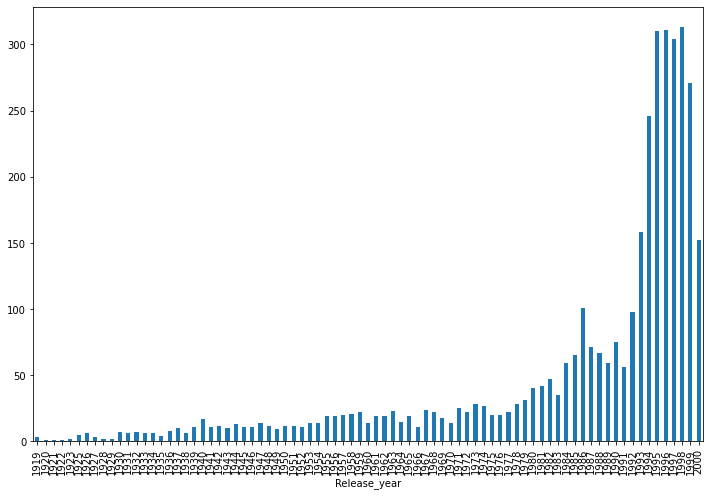

In [20]:
final_data.groupby("Release_year")["Title"].nunique().plot(kind="bar")

## Users of which age group have watched and rated the most number of movies?



In [21]:
final_data.groupby("Age")["Title"].nunique()

Age
18-24       3326
25-34       3439
35-44       3381
45-49       3221
50-55       3200
56+         2857
Under 18    2592
Name: Title, dtype: int64

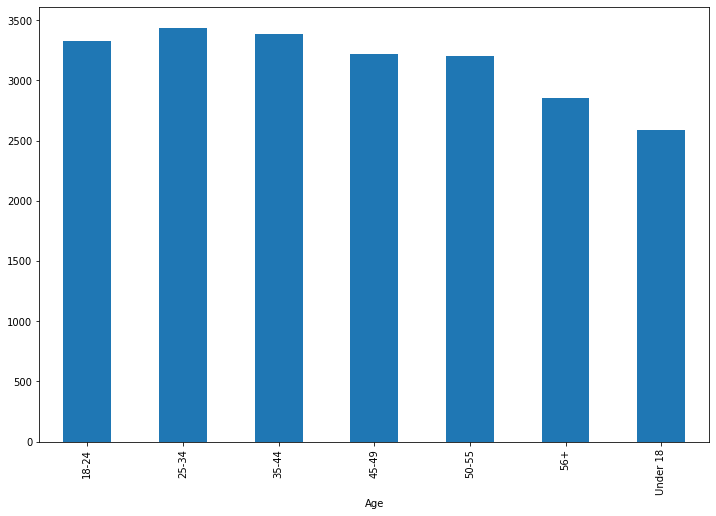

In [22]:
final_data.groupby("Age")["Title"].nunique().plot(kind="bar")

## Users belonging to which profession have watched and rated the most movies?



In [23]:
final_data.groupby("Occupation")["Title"].nunique().sort_values()

Occupation
farmer                  1422
homemaker               2160
retired                 2292
K-12 student            2404
tradesman/craftsman     2407
scientist               2469
lawyer                  2527
customer service        2586
unemployed              2628
programmer              2869
clerical/admin          2898
sales/marketing         2898
doctor/health care      2951
technician/engineer     3031
self-employed           3062
artist                  3083
academic/educator       3155
executive/managerial    3206
writer                  3267
college/grad student    3299
other                   3379
Name: Title, dtype: int64

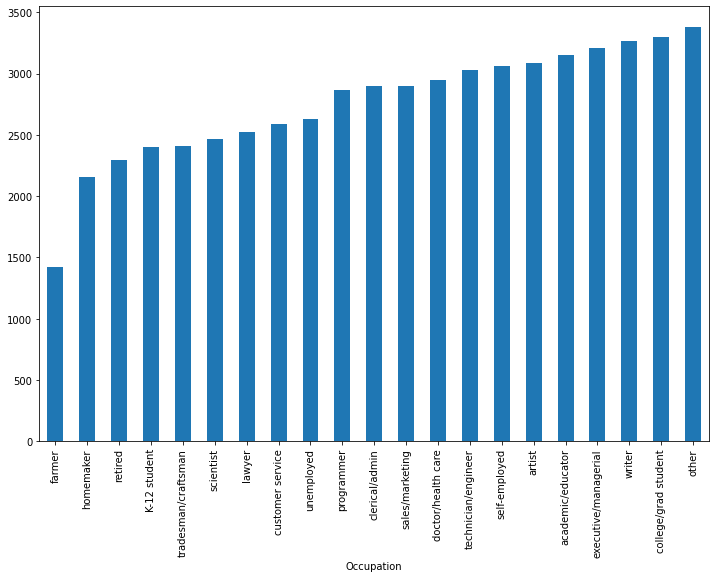

In [24]:
final_data.groupby("Occupation")["Title"].nunique().sort_values().plot(kind="bar")

## Most of the users in our dataset who’ve rated the movies are Male. (T/F)



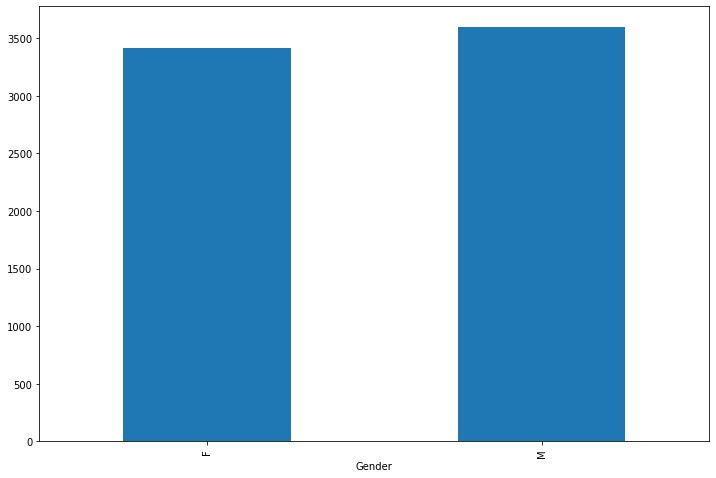

In [25]:
final_data.groupby("Gender")["Title"].nunique().sort_values().plot(kind="bar")

## The movie with maximum no. of ratings is ___.



In [26]:
final_data.groupby("Title")["Rating"].count().reset_index().sort_values(by="Rating",ascending=False).head(10)

,Title,Rating
125,American Beauty,3428
3092,Star Wars: Episode IV - A New Hope,2991
3093,Star Wars: Episode V - The Empire Strikes Back,2990
3094,Star Wars: Episode VI - Return of the Jedi,2883
1756,Jurassic Park,2672
2837,Saving Private Ryan,2653
3231,Terminator 2: Judgment Day,2649
2070,"Matrix, The",2590
255,Back to the Future,2583
2929,"Silence of the Lambs, The",2578


In [27]:
pd.set_option("max_colwidth", None)


# Co-occurance | Frequency Based Recommender System (Apriory)

In [ ]:
frame = data.groupby(["UserID","Title"])["Rating"].mean().unstack().reset_index().fillna(0).set_index('UserID')

In [ ]:
frame = (frame > 0).astype(int)
frame.shape

In [45]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets_plus = apriori(frame, min_support=0.2, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)


frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))



In [47]:

frequent_itemsets_plus.shape

(76226, 3)

In [49]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets_plus, metric ="lift", min_threshold = 0.8)
rules.shape

(1793712, 9)

In [64]:
rules[rules["antecedents"] == rules.loc[1378603]["antecedents"]].sort_values(by="lift",ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
534798,(Saving Private Ryan ),"(Braveheart , Schindler's List , Matrix, The )",0.439238,0.150000,0.132119,0.300792,2.005277,0.066233,1.215660
1360350,(Saving Private Ryan ),"(Terminator 2: Judgment Day , Men in Black , Fugitive, The , Braveheart , Matrix, The )",0.439238,0.139238,0.122517,0.278930,2.003251,0.061358,1.193727
1720590,(Saving Private Ryan ),"(Braveheart , True Lies , Matrix, The )",0.439238,0.137086,0.120364,0.274029,1.998958,0.060151,1.188635
1759348,(Saving Private Ryan ),"(Silence of the Lambs, The , Braveheart , Men in Black , Matrix, The )",0.439238,0.137086,0.120199,0.273652,1.996209,0.059985,1.188018
1339075,(Saving Private Ryan ),"(Terminator 2: Judgment Day , Star Wars: Episode V - The Empire Strikes Back , Fugitive, The , Braveheart , Matrix, The )",0.439238,0.140066,0.122682,0.279306,1.994103,0.061160,1.193203


In [60]:
rules.shape

(1793712, 9)

### Item-Item Similarity Based Rec System 

## Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.



In [490]:
movies

,MovieID,Title,Genres,Release_year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Animation, Children's, Musical, Romance]",1995
2,3,Grumpier Old Men,[Drama],1995
3,4,Waiting to Exhale,"[Action, Adventure, Fantas]",1995
4,5,Father of the Bride Part II,"[Drama, War]",1995
...,...,...,...,...
3878,3948,Meet the Parents,"[Action, Adventure, Comedy, Romance]",2000
3879,3949,Requiem for a Dream,"[Action, Adventure]",2000
3880,3950,Tigerland,"[Action, Sci-Fi, Thriller, War]",2000
3881,3951,Two Family House,"[Drama, War]",2000


In [494]:
movies[movies["Title"].str.contains("Liar Liar")]

,MovieID,Title,Genres,Release_year
1455,1485,Liar Liar,"[Adventure, Fantasy, Sci-Fi]",1997


In [500]:
m = movies[["MovieID","Title","Genres"]]

m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"Horro":"Horror",
                     "Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi",
                     "Dr":"Drama",
                     "Documenta":"Documentary",
                     "Wester":"Western",
                     "Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance",
                     "Animati":"Animation",
                     "Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi",
                     "Roma":"Romance","A":"Adventure","Children":"Children's",
                     "Adventu":"Adventure",
                      "Adv":"Adventure",
                      "Wa":"War",
                      "Thrille"  :"Thriller"     ,
                      "Com"        :"Comedy"   ,
                      "Comed"         :"Comedy",
                      "Acti"          :"Action",
                        "Advent"        :"Adventure",
                        "Adventur"      :"Adventure",
                        "Thri":"Thriller",          
                        "Chi":"Children's",           
                        "Ro":"Romance",            
                        "F":"Fantasy",             
                        "We":"Western",            
                        "Documen":"Documentary"       ,
                        "Music":"Musical"         ,
                        "Children":"Children's" ,    
                        "Horr":"Horror"          ,
                     "Children'":"Children's",
                     "Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                     })
m = pd.crosstab(m["MovieID"],m["Genres"])  
m = pd.DataFrame(np.where(m>=1,1,0),index = m.index,columns=m.columns)

In [519]:
def Hamming_distance(x1,x2):
  return np.sum(abs(x1-x2))

In [529]:

Query = "1485"
for candidate in m.index:
  if candidate == Query:
    continue
  Ranks.append([Query,candidate,Hamming_distance(m.loc[Query],m.loc[candidate])])

In [532]:
Ranks = pd.DataFrame(Ranks,columns=["Query","Candidate","Hamming_distance"])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Query', right_on='MovieID').rename(columns={'Title': 'query_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Candidate', right_on='MovieID').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.sort_values(by=['Query', 'Hamming_distance'])



array(['Liar Liar '], dtype=object)

In [536]:

Ranks.head()

,Query,Candidate,Hamming_distance,query_tittle,candidate_tittle
161,1485,1146,0,Liar Liar,Curtis's Charm
955,1485,1912,0,Liar Liar,Out of Sight
2331,1485,3155,0,Liar Liar,Anna and the King
2603,1485,3402,0,Liar Liar,Turtle Diary
50,1485,1043,1,Liar Liar,To Gillian on Her 37th Birthday


In [ ]:
a

# Collaborative Filtering : 

In [565]:
user_movie_ratings = ratings.pivot(index ="UserID",
              columns = "MovieID",
              values ="Rating").fillna(0)

In [566]:
user_movie_ratings.shape

(6040, 3706)

In [567]:
# 6040 users # 3706 movies 

In [568]:
ratings.shape, users.shape

((1000209, 4), (6040, 5))

In [596]:
ratings

,UserID,MovieID,Rating,Watch_Hour
0,1,1193,5,22
1,1,661,3,22
2,1,914,3,22
3,1,3408,4,22
4,1,2355,5,23
...,...,...,...,...
1000204,6040,1091,1,2
1000205,6040,1094,5,23
1000206,6040,562,5,23
1000207,6040,1096,4,2


In [597]:

rm_raw = ratings[['UserID', 'MovieID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names


In [598]:
rm_raw

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [599]:
from cmfrec import CMF

model = CMF(k=5, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [600]:
rm_raw.shape,model.A_.shape,model.B_.shape

((1000209, 3), (6040, 5), (3706, 5))

In [601]:
model.A_.shape,model.B_.T.shape

((6040, 5), (5, 3706))

In [602]:
top_items = model.topN(user=5, n=10)


movies.loc[movies.MovieID.isin(top_items)]

,MovieID,Title,Genres,Release_year
52,53,Lamerica,[Drama],1994
662,668,Pather Panchali,"[Action, Crime, Romance]",1955
664,670,"World of Apu, The",[Drama],1959
910,922,Sunset Blvd.,[Comedy],1950
911,923,Citizen Kane,"[Crime, Drama]",1941
1950,2019,Seven Samurai,"[Crime, Thriller]",NaN
2770,2839,West Beirut,"[Comedy, Romance]",1998
3065,3134,Grand Illusion,"[Action, Adventure, Sci-Fi]",1937
3237,3306,"Circus, The","[Comedy, Drama, Romance]",1928
3835,3905,"Specials, The","[Action, Sci-Fi]",2000


In [603]:
 model.topN(user=5, n=10)

array(['3905', '670', '53', '2839', '668', '3306', '923', '922', '3134',
       '2019'], dtype=object)

In [604]:
 model.topN(user=15, n=10)

array(['3905', '670', '53', '2839', '668', '3306', '923', '922', '3134',
       '2019'], dtype=object)